## News Mood

### Observations
* CBS has the most number positive tweets and BBC World has the most number of negative tweets
* CNN and New York Times tend towards tweeting more neutral tweets
* The tweets of CBS are becoming increasingly positive as the number of tweets increase

In [1]:
# Import Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Search Term
target_terms = ("@bbcworld","@cbs","@cnn","@foxnews","@nytimes")

# List to hold results
results_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
source_account=[]
text=[]
date=[]
tweets_ago=[]

for target in target_terms:
    tweet_count=1
    # Loop through 5 pages
    for x in range(1,6):

        # Run search around each tweet
        public_tweets = api.user_timeline(target,page=x)

        # Loop through all tweets
        for tweet in public_tweets:

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])

                # Add each value to the appropriate list
                source_account.append(tweet['user']['name'])
                text.append(tweet['text'])
                date.append(tweet['created_at'])
                compound_list.append(results["compound"])
                positive_list.append(results["pos"])
                negative_list.append(results["neu"])
                neutral_list.append(results["neg"])
                tweets_ago.append(tweet_count)
                tweet_count+=1

#Create dictionary from the lists
news={"Source Account":source_account,"Text":text,"Date":date,"Compound Score":compound_list,"Positive Score":positive_list,"Negative Score":negative_list,"Neutral Score":neutral_list,"Tweets Ago":tweets_ago}

#Create dataframe
news_df=pd.DataFrame(news).round(3)
news_df

,Source Account,Text,Date,Compound Score,Positive Score,Negative Score,Neutral Score,Tweets Ago
0,BBC News (World),The bean at the heart of America's trade war h...,Thu Aug 02 00:00:24 +0000 2018,-0.599,0.000,0.698,0.302,1
1,BBC News (World),Toddler mauled by dog dies in Australia https:...,Wed Aug 01 23:45:14 +0000 2018,0.000,0.000,1.000,0.000,2
2,BBC News (World),The European populists monitoring 'sham' elect...,Wed Aug 01 23:11:21 +0000 2018,0.000,0.000,1.000,0.000,3
3,BBC News (World),Russia shocked by mysterious murder of three j...,Wed Aug 01 23:08:37 +0000 2018,-0.791,0.000,0.562,0.438,4
4,BBC News (World),Officer wins suit over claim he was mocked for...,Wed Aug 01 22:40:25 +0000 2018,0.340,0.231,0.625,0.144,5
5,BBC News (World),The moment a passenger plane crashed in Mexico...,Wed Aug 01 20:56:18 +0000 2018,0.422,0.128,0.872,0.000,6
6,BBC News (World),New Zealand PM Jacinda Ardern returns from mat...,Wed Aug 01 20:14:58 +0000 2018,-0.052,0.000,0.882,0.118,7
7,BBC News (World),RT @BBCNews: Passengers were forced to evacuat...,Wed Aug 01 19:48:28 +0000 2018,-0.459,0.000,0.870,0.130,8
8,BBC News (World),Jewellery thefts that shocked the world https:...,Wed Aug 01 19:31:55 +0000 2018,-0.318,0.000,0.723,0.277,9
9,BBC News (World),US hits Turkish ministers with sanctions over ...,Wed Aug 01 19:02:10 +0000 2018,0.000,0.000,1.000,0.000,10


In [3]:
#to csv file
news_df.to_csv("news.csv")

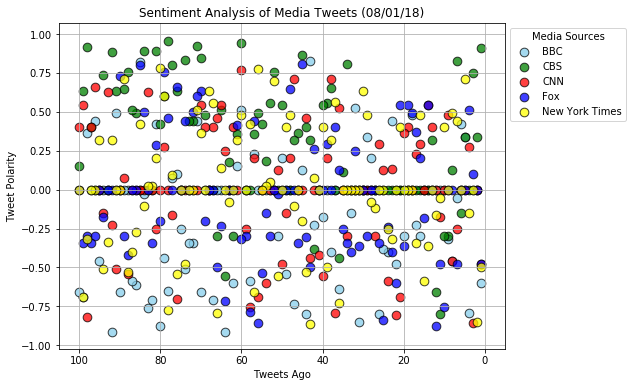

In [4]:
#Sentiment analysis of media tweets 
#Segregate sentiments according to the news channel
bbc_df=news_df.loc[news_df["Source Account"]=="BBC News (World)"]
cbs_df=news_df.loc[news_df["Source Account"]=="CBS"]
cnn_df=news_df.loc[news_df["Source Account"]=="CNN"]
fox_df=news_df.loc[news_df["Source Account"]=="Fox News"]
nyt_df=news_df.loc[news_df["Source Account"]=="The New York Times"]

#get today's date
today_date = datetime.datetime.now().strftime('%D')

#plot scatter plot
plt.figure(figsize=(8,6))
plot=plt.scatter(bbc_df["Tweets Ago"], bbc_df["Compound Score"],s=75, marker="o", facecolors="skyblue", edgecolors="black",label="BBC",alpha=0.75)
plot=plt.scatter(cbs_df["Tweets Ago"], cbs_df["Compound Score"],s=75, marker="o", facecolors="green", edgecolors="black",label="CBS",alpha=0.75)
plot=plt.scatter(cnn_df["Tweets Ago"], cnn_df["Compound Score"],s=75, marker="o", facecolors="red", edgecolors="black",label="CNN",alpha=0.75)
plot=plt.scatter(fox_df["Tweets Ago"], fox_df["Compound Score"],s=75, marker="o", facecolors="blue", edgecolors="black",label="Fox",alpha=0.75)
plot=plt.scatter(nyt_df["Tweets Ago"], nyt_df["Compound Score"],s=75, marker="o", facecolors="yellow", edgecolors="black",label="New York Times",alpha=0.75)

# Incorporate the other graph properties
plt.xlim(105,-5)
plt.legend(title="Media Sources",bbox_to_anchor = (1,1))
plt.title(f"Sentiment Analysis of Media Tweets ({today_date})")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.grid()
plt.savefig("Sentiment_Analysis_of_Media_Tweets.png")


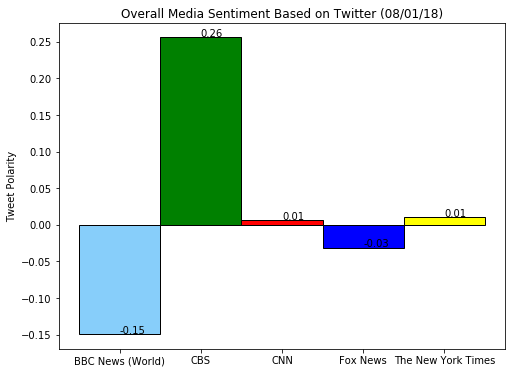

In [5]:
#Overall Media Sentiment Based on Twitter
#Average overall sentiment
average_sentiment=news_df.groupby('Source Account')['Compound Score'].mean()

#Plot bar graph 
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
plt.figure(figsize=(8,6))
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['lightskyblue', 'green', 'red', 'blue', 'yellow'], edgecolor="black",width=1)

#plot value for each bar
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.001, str(round(sentiment,2)))
    count += 1

# Incorporate the other graph properties
plt.title(f"Overall Media Sentiment Based on Twitter ({today_date})")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall_Media_Sentiment_Based_on_Twitter.png")



